In [1]:
#Dependencies
from config import FBI_api_key
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import csv
import json
import datetime



In [2]:
#load the crime data csv
file = "../Resources/NEIGHBORHOOD_CRIME_STATS.csv"
crime_stats = pd.read_csv(file)
crime_stats.head()

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017
1,2,** NOT ASSIGNED **,Arson,0.0,8,2017
2,3,** NOT ASSIGNED **,Auto Theft,3.0,8,2017
3,4,** NOT ASSIGNED **,Burglary,1.0,8,2017
4,5,** NOT ASSIGNED **,Homicide,0.0,8,2017


In [13]:
#load the weather data csv
file = "../Resources/weather_data_full.csv"
weather_data = pd.read_csv(file)
weather_data.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,1,2008-07-01,29,83,16,61,23,73,0.0,0.00,...,21,23,74,6,05:31 AM,09:03 PM,03:25 AM,08:17 PM,Waning Gibbous,89.7
1,1,2008-07-02,25,76,18,65,22,72,1.2,0.05,...,24,23,74,6,05:31 AM,09:03 PM,04:31 AM,09:15 PM,Waning Gibbous,82.8
2,1,2008-07-03,25,77,13,55,19,65,0.0,0.00,...,9,18,65,5,05:32 AM,09:03 PM,05:49 AM,09:58 PM,Waning Gibbous,75.9
3,1,2008-07-04,27,80,15,60,21,70,0.0,0.00,...,11,21,70,6,05:33 AM,09:03 PM,07:12 AM,10:30 PM,Last Quarter,69.0
4,1,2008-07-05,28,82,18,64,22,72,0.0,0.00,...,25,23,74,6,05:33 AM,09:02 PM,08:33 AM,10:56 PM,Last Quarter,62.1


In [4]:

# weather_data.dtypes



In [28]:
weather_df = weather_data[['date', 'maxtempF', 'mintempF', 'totalprecipIn', 'windspeedMiles', 'humidity', 'FeelsLikeF']]
weather_df.head()

,date,maxtempF,mintempF,totalprecipIn,windspeedMiles,humidity,FeelsLikeF
0,2008-07-01,83,61,0.00,8,62,74
1,2008-07-02,76,65,0.05,10,62,74
2,2008-07-03,77,55,0.00,4,67,65
3,2008-07-04,80,60,0.00,4,66,70
4,2008-07-05,82,64,0.00,10,65,74


In [55]:
new = weather_df["date"].str.split("-", n = 2, expand = True)
weather_df["year"]= new[0]
weather_df["month"]= new[1]
weather_df["day"]= new[2]  
weather_df.head()

<ipython-input-55-1b097e0505fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["year"]= new[0]
<ipython-input-55-1b097e0505fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["month"]= new[1]
<ipython-input-55-1b097e0505fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,date,maxtempF,mintempF,totalprecipIn,windspeedMiles,humidity,FeelsLikeF,year,month,day
3106,2017-01-01,27,21,0.00,7,91,15,2017,01,01
3107,2017-01-02,31,26,0.02,9,95,20,2017,01,02
3108,2017-01-03,30,4,0.00,14,91,3,2017,01,03
3109,2017-01-04,3,-5,0.00,14,88,-20,2017,01,04
3110,2017-01-05,0,-6,0.00,8,89,-19,2017,01,05


In [32]:
weather_df = weather_df.loc[(weather_df["date"] >= '2017-01-01') & (weather_df["date"] <= '2020-12-31')]
weather_df.head

<bound method NDFrame.head of             date  maxtempF  mintempF  totalprecipIn  windspeedMiles  humidity  \
3106  2017-01-01        27        21           0.00               7        91   
3107  2017-01-02        31        26           0.02               9        95   
3108  2017-01-03        30         4           0.00              14        91   
3109  2017-01-04         3        -5           0.00              14        88   
3110  2017-01-05         0        -6           0.00               8        89   
...          ...       ...       ...            ...             ...       ...   
4562  2020-12-27        23        13           0.05               6        94   
4563  2020-12-28        15         7           0.01               7        92   
4564  2020-12-29        19         1           0.11               7        91   
4565  2020-12-30        23         6           0.09               8        94   
4566  2020-12-31        20         4           0.00               5        92  

In [33]:
weather_2017 = weather_df.loc[(weather_df["date"] >= '2017-01-01') & (weather_df["date"] <= '2017-12-31')]
weather_2018 = weather_df.loc[(weather_df["date"] >= '2018-01-01') & (weather_df["date"] <= '2018-12-31')]
weather_2019 = weather_df.loc[(weather_df["date"] >= '2019-01-01') & (weather_df["date"] <= '2019-12-31')]
weather_2020 = weather_df.loc[(weather_df["date"] >= '2020-01-01') & (weather_df["date"] <= '2020-12-31')]

In [38]:
max_av_2017 = weather_2017['maxtempF'].mean()
max_av_2018 = weather_2018['maxtempF'].mean()
max_av_2019 = weather_2019['maxtempF'].mean()
max_av_2020 = weather_2020['maxtempF'].mean()
print(F'{max_av_2017},{max_av_2018},{max_av_2019},{max_av_2020}')
min_av_2017 = weather_2017['mintempF'].mean()
min_av_2018 = weather_2018['mintempF'].mean()
min_av_2019 = weather_2019['mintempF'].mean()
min_av_2020 = weather_2020['mintempF'].mean()
print(F'{min_av_2017},{min_av_2018},{min_av_2019},{min_av_2020}')
max_high_2017 = weather_2017['maxtempF'].max()
max_high_2018 = weather_2018['maxtempF'].max()
max_high_2019 = weather_2019['maxtempF'].max()
max_high_2020 = weather_2020['maxtempF'].max()
print(F'{max_high_2017},{max_high_2018},{max_high_2019},{max_high_2020}')
max_low_2017 = weather_2017['mintempF'].min()
max_low_2018 = weather_2018['mintempF'].min()
max_low_2019 = weather_2019['mintempF'].min()
max_low_2020 = weather_2020['mintempF'].min()
print(F'{max_low_2017},{max_low_2018},{max_low_2019},{max_low_2020}')

54.5013698630137,52.893150684931506,51.11780821917808,53.59836065573771
40.441095890410956,39.1945205479452,37.49589041095891,40.82513661202186
94,100,92,94
-14,-12,-27,-15


In [61]:
# weather_df.groupby('year').count()
weather_group = weather_df.groupby(['year', 'month']).mean()
weather_group

maxtempF   mintempF  totalprecipIn  windspeedMiles   humidity  \
year month                                                                   
2017 01     23.838710  13.612903       0.043548        7.967742  93.258065   
     02     36.000000  23.357143       0.023214        9.714286  80.500000   
     03     39.709677  27.096774       0.035161       10.129032  68.709677   
     04     56.800000  41.000000       0.098333        8.866667  71.966667   
     05     63.838710  47.419355       0.163548        8.741935  75.419355   
     06     77.000000  58.533333       0.134333        8.266667  73.633333   
     07     82.483871  64.290323       0.140000        6.419355  74.129032   
     08     76.096774  60.580645       0.117419        6.677419  69.967742   
     09     75.900000  58.866667       0.086333        8.400000  64.633333   
     10     58.193548  46.354839       0.089677        9.258065  62.677419   
     11     40.266667  28.933333       0.014667        8.266667  65.033333   
     12     23.129032  14.419355       0.020000        7.354839  80.483871   
2018 01     21.387097   9.129032       0.046774        7.580645  88.096774   
     02     20.857143   7.535714       0.034286        7.142857  88.392857   
     03     36.322581  24.838710       0.029677        7.387097  81.258065   
     04     44.800000  28.166667       0.068333        7.666667  75.266667   
     05     76.903226  58.516129       0.086452        6.451613  61.419355   
     06     79.600000  64.766667       0.401333        7.700000  72.000000   
     07     83.516129  67.032258       0.077419        6.645161  67.032258   
     08     82.741935  65.483871       0.153226        6.419355  68.935484   
     09     72.133333  58.133333       0.103333        7.866667  69.400000   
     10     52.290323  39.838710       0.085161        8.354839  68.709677   
     11     32.600000  23.833333       0.031333        7.733333  70.900000   
     12     29.032258  20.580645       0.044839        6.677419  84.096774   
2019 01     18.225806   7.096774       0.017097        7.580645  78.903226   
     02     19.535714   3.214286       0.068571        7.357143  92.035714   
     03     34.838710  20.419355       0.041613        7.903226  80.741935   
     04     53.866667  39.133333       0.107333        8.633333  66.433333   
     05     64.645161  47.419355       0.133226        8.548387  67.193548   
     06     76.600000  61.566667       0.142000        7.433333  69.966667   
     07     81.709677  67.290323       0.142903        7.322581  72.645161   
     08     76.612903  62.483871       0.097419        7.322581  70.483871   
     09     73.100000  58.966667       0.119333        9.333333  73.866667   
     10     51.774194  41.032258       0.077097       10.322581  66.032258   
     11     34.966667  26.366667       0.056667        8.133333  72.733333   
     12     25.580645  12.806452       0.035806        6.741935  92.741935   
2020 01     22.838710   8.741935       0.047097        7.451613  91.032258   
     02     22.586207   9.862069       0.025517        7.862069  87.413793   
     03     42.000000  30.387097       0.085806        8.612903  71.935484   
     04     51.400000  37.033333       0.069333        8.866667  58.400000   
     05     63.483871  50.677419       0.108387        8.161290  61.967742   
     06     78.266667  64.166667       0.136333        9.733333  65.766667   
     07     84.483871  70.774194       0.076452        7.354839  66.161290   
     08     80.516129  67.451613       0.064839        8.000000  65.193548   
     09     70.833333  56.866667       0.042000        8.966667  55.300000   
     10     49.225806  38.064516       0.037742        8.580645  63.000000   
     11     45.666667  34.033333       0.088000        9.100000  67.566667   
     12     30.903226  20.774194       0.013548        6.935484  72.645161   

            FeelsLikeF  
year month              
2017 01       8.645161  
     02      20.071429  
     03     

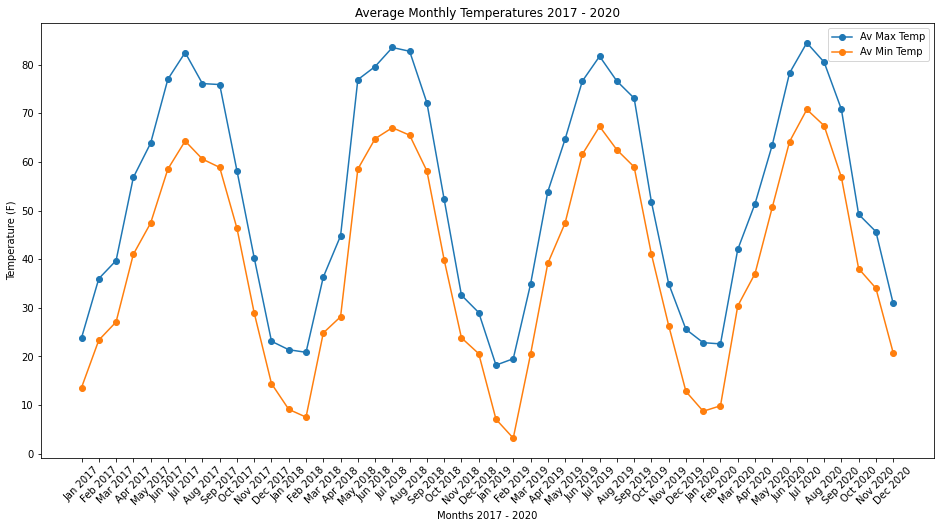

In [84]:
# The maximum x value for our chart will be 100
# x_limit = 1461
x_limit = 48
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)
labels = ['Jan 2017', 'Feb 2017', 'Mar 2017','Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017',
          'Jan 2018', 'Feb 2018', 'Mar 2018','Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018',
          'Jan 2019', 'Feb 2019', 'Mar 2019','Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019',
          'Jan 2020', 'Feb 2020', 'Mar 2020','Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020',]
# fig, ax = plt.subplots()
plt.figure(figsize=(16, 8))
plt.xlabel('Months 2017 - 2020')
plt.ylabel('Temperature (F)')
plt.title('Average Monthly Temperatures 2017 - 2020')
plt.xticks(rotation = 45)
plt.plot(labels, weather_group['maxtempF'], marker ='o', label='Av Max Temp')
plt.plot(labels, weather_group['mintempF'], marker ='o', label='Av Min Temp')
plt.legend()
# plt.plot(weather_df['date'], weather_df['mintempF'], secondary_y = True)
plt.show()

In [96]:
vehicle_theft_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/motor-vehicle-theft/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
vehicle_data = response.json()
vehicle_theft_stats.append(vehicle_data)
vehicle_theft_stats

     

[{'results': [{'male_count': 14,
    'female_count': 3,
    'unknown': 0,
    'data_year': 2016},
   {'male_count': 74, 'female_count': 31, 'unknown': 4, 'data_year': 2017},
   {'male_count': 218, 'female_count': 68, 'unknown': 6, 'data_year': 2018},
   {'male_count': 1433,
    'female_count': 425,
    'unknown': 2372,
    'data_year': 2019}],
  'pagination': {'count': 4, 'page': 0, 'pages': 1, 'per_page': 0}}]

In [101]:
year = []
female = []
male = []
for x in vehicle_theft_stats:
    for i in ['results']:
        year.append(x['results'][0]['data_year'])
        female.append(x['results'][0]['female_count'])
        male.append(x['results'][0]["male_count"])
year  

[2016]

In [92]:
larceny_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/larceny-theft-offenses/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
larceny_data = response.json()
larceny_stats.append(larceny_data)
larceny_stats

[{'results': [{'male_count': 39,
    'female_count': 19,
    'unknown': 1,
    'data_year': 2016},
   {'male_count': 203, 'female_count': 103, 'unknown': 7, 'data_year': 2017},
   {'male_count': 603, 'female_count': 306, 'unknown': 25, 'data_year': 2018},
   {'male_count': 3551,
    'female_count': 1540,
    'unknown': 4688,
    'data_year': 2019},
   {'male_count': 0, 'female_count': 0, 'unknown': 0, 'data_year': 2016},
   {'male_count': 5, 'female_count': 2, 'unknown': 0, 'data_year': 2017},
   {'male_count': 7, 'female_count': 7, 'unknown': 0, 'data_year': 2018},
   {'male_count': 54, 'female_count': 31, 'unknown': 15, 'data_year': 2019},
   {'male_count': 0, 'female_count': 4, 'unknown': 0, 'data_year': 2017},
   {'male_count': 9, 'female_count': 12, 'unknown': 1, 'data_year': 2018},
   {'male_count': 397, 'female_count': 71, 'unknown': 70, 'data_year': 2019},
   {'male_count': 82, 'female_count': 35, 'unknown': 0, 'data_year': 2016},
   {'male_count': 216, 'female_count': 183, 'un

In [93]:
burglary_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/burglary-breaking-and-entering/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
burglary_data = response.json()
burglary_stats.append(burglary_data)
burglary_stats

[{'results': [{'male_count': 26,
    'female_count': 5,
    'unknown': 0,
    'data_year': 2016},
   {'male_count': 167, 'female_count': 40, 'unknown': 13, 'data_year': 2017},
   {'male_count': 557, 'female_count': 169, 'unknown': 24, 'data_year': 2018},
   {'male_count': 2075,
    'female_count': 403,
    'unknown': 2666,
    'data_year': 2019}],
  'pagination': {'count': 4, 'page': 0, 'pages': 1, 'per_page': 0}}]

In [90]:
arson_stats = []
url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/arson/offender/states/mn/sex?API_KEY=" +FBI_api_key
response = requests.get(url)
arson_data = response.json()
arson_stats.append(arson_data)
arson_stats

[{'results': [{'male_count': 7,
    'female_count': 0,
    'unknown': 0,
    'data_year': 2017},
   {'male_count': 23, 'female_count': 9, 'unknown': 0, 'data_year': 2018},
   {'male_count': 76, 'female_count': 28, 'unknown': 5, 'data_year': 2019}],
  'pagination': {'count': 3, 'page': 0, 'pages': 1, 'per_page': 0}}]

In [94]:
# crimes = ['arson', 'motor-vehicle-theft', 'burglary-breaking-and-entering', 'larceny-theft-offenses']
# arson_stats = []
# for x in crimes:
#     url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/" + x + "/offender/states/mn/sex?API_KEY=" +FBI_api_key
#     response = requests.get(url)
#     gender_data = response.json()
#     crimes_stats.append(gender_data)
# crimes_stats

In [ ]:
#FBI stats


In [49]:
crime_stats.groupby('ucrDescription').count()
crime_desc = ['Aggravated Assault', 'Arson', 'Auto Theft', 'Burglary', 'Homicide', 'Larceny', 'Rape', 'Robbery']

,neighborhoodCrimeStatisticsID,neighborhood,number,reportMonth,reportYear
ucrDescription,,,,,
Aggravated Assault,3872,3872,3500,3872,3872
Arson,3872,3872,3132,3872,3872
Auto Theft,3872,3872,3623,3872,3872
Burglary,3872,3872,3722,3872,3872
Homicide,3872,3872,3104,3872,3872
Larceny,3872,3872,3837,3872,3872
Rape,3872,3872,3308,3872,3872
Robbery,3872,3872,3460,3872,3872


In [27]:
arson = []
auto_theft = []
burglary = []
larceny = []
yearly_nviolent = crime_stats['reportYear'].value_counts().rename_axis('Year').reset_index() 
# yearly_nviolent['Arson'] = crime_stats.groupby(['reportYear','ucrDescription'])['Arson'].count()
# yearly_group = crime_stats.groupby(['reportYear','ucrDescription'])['Arson'].count()
# yearly_group
yearly_nviolent.head()

,Year,reportYear
0,2020,8448
1,2019,8448
2,2018,8448
3,2017,3520
4,2021,2112
